In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_adver=pd.read_csv("Adver.csv")
ds_adver

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
ds_adver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Checking Null Values

In [4]:
ds_adver.isnull().sum() #no null values in the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

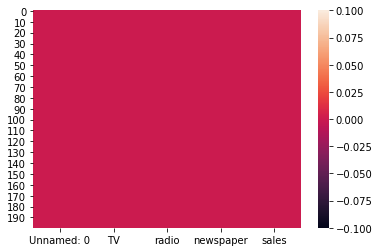

In [5]:
sns.heatmap(ds_adver.isnull())

### Describing Statistics

In [6]:
ds_adver.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Dropping Columns

In [7]:
ds_adver.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
ds_adver

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Checking Correlation

In [9]:
ds_adver.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


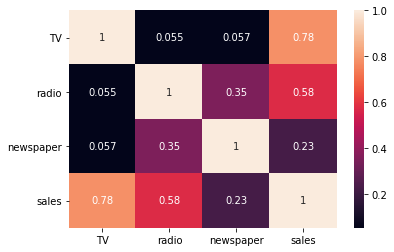

In [10]:
sns.heatmap(ds_adver.corr(),annot=True)

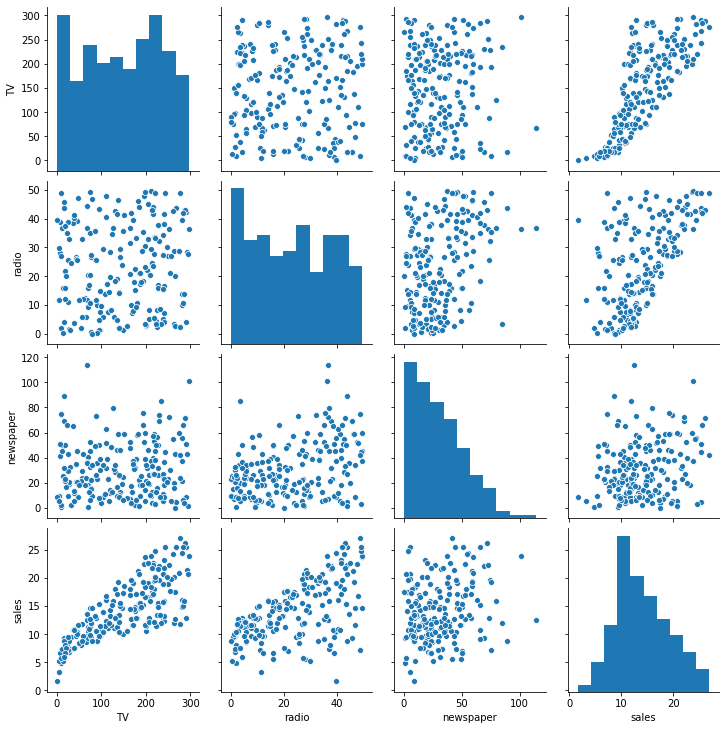

In [11]:
sns.pairplot(ds_adver)

### Bi-Variate  Analysis

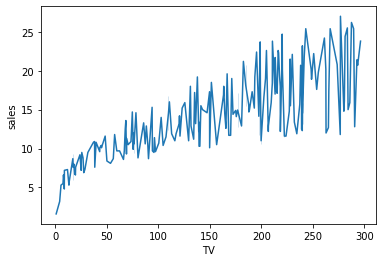

In [12]:
sns.lineplot(x="TV",y="sales",data=ds_adver)

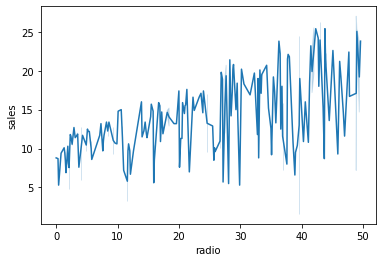

In [13]:
sns.lineplot(x="radio",y="sales",data=ds_adver)

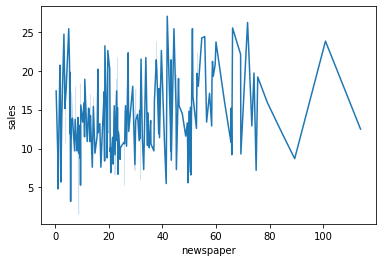

In [14]:
sns.lineplot(x="newspaper",y="sales",data=ds_adver)

### Checking Skewness 

In [15]:
ds_adver.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### Plotting Distribution

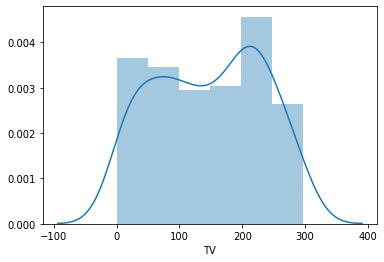

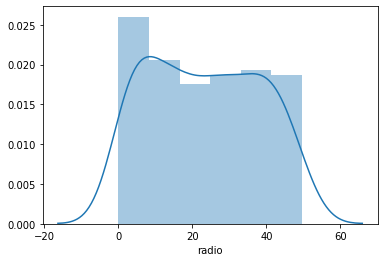

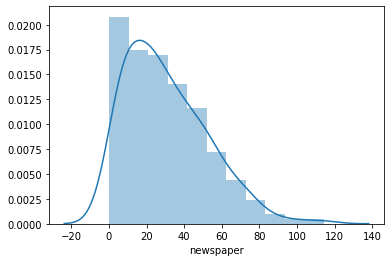

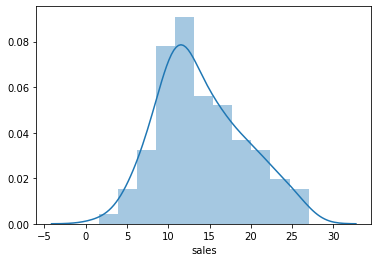

In [16]:
for i in ds_adver.columns:
    plt.figure()
    sns.distplot(ds_adver[i])

### Log Transformation

In [17]:
for col in ds_adver:                  
    if ds_adver.skew().loc[col]>.55:
        ds_adver[col]=np.log1p(ds_adver[col])

In [18]:
ds_adver.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

### Replotting Distribution

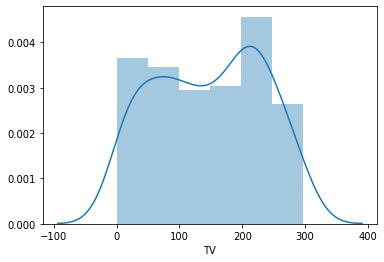

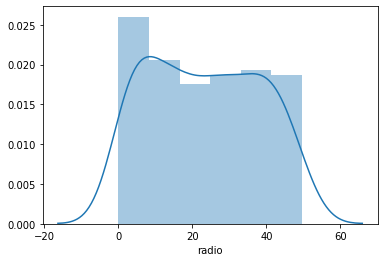

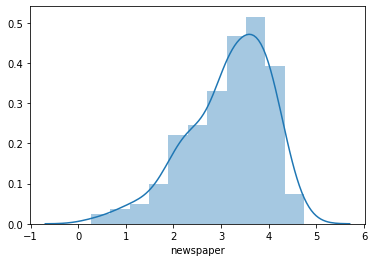

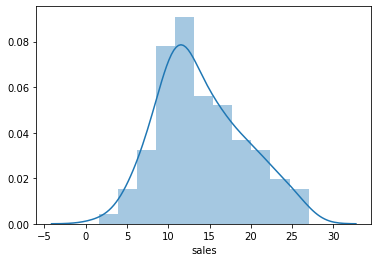

In [19]:
for i in ds_adver:
    plt.show()
    sns.distplot(ds_adver[i])

### Plotting Outliers

In [20]:
from scipy.stats import zscore
z_score=abs(zscore(ds_adver))
print(ds_adver.shape)
ds_adver_final=ds_adver.loc[(z_score<3).all(axis=1)]
print(ds_adver_final.shape)

(200, 4)
(199, 4)


### Seperating Target and Input Variables

In [31]:
x=ds_adver_final.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


In [32]:
y=ds_adver_final.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 199, dtype: float64

### Scaling Input Variables

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.79089948e-01,  9.78080220e-01,  1.28730630e+00],
       [-1.19319934e+00,  1.07912436e+00,  7.87741098e-01],
       [-1.51272249e+00,  1.52371859e+00,  1.28899730e+00],
       [ 5.91441612e-02,  1.21384989e+00,  1.09085648e+00],
       [ 4.02075606e-01, -8.40714347e-01,  1.08885829e+00],
       [-1.61220773e+00,  1.72580688e+00,  1.38160990e+00],
       [-1.04104546e+00,  6.41266412e-01,  3.68052853e-02],
       [-3.07195573e-01, -2.47922044e-01, -7.53137850e-01],
       [-1.61337814e+00, -1.42677037e+00, -2.93957598e+00],
       [ 6.24454358e-01, -1.39308899e+00, -8.03015175e-02],
       [-9.40389811e-01, -1.17752816e+00,  7.02702235e-02],
       [ 7.98846117e-01,  4.84741080e-02, -1.85108972e+00],
       [-1.43547514e+00,  7.96200764e-01,  1.23010841e+00],
       [-5.72879662e-01, -1.05627519e+00, -1.26342682e+00],
       [ 6.74782181e-01,  6.48002688e-01,  8.10709248e-01],
       [ 5.72956121e-01,  1.64497156e+00,  9.73434870e-01],
       [-9.20492764e-01,  8.97244906e-01

In [36]:
x.shape

(199, 3)

### Splitting data into Training and Testing

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=60)

In [45]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(40, 3)
(159, 3)
(40,)
(159,)


### Importing Metrics

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Defining Model Functions

In [59]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    y_pred=ml.predict(x_test)
    score=cross_val_score(a,x,y,cv=3)
    b=score.mean()
    pred=cross_val_predict(a,x,y,cv=3)
    c=r2_score(y,pred)
    return(print('Training_score = ',ml.score(x_train,y_train),
                 '\n\n cross_val_score = ',b,
                 '\n\n cross_val_predict = ',c,
                 '\n\n R2_score = ',r2_score(y_test,y_pred),
                 '\n\n MAE = ',mean_absolute_error(y_test,y_pred),
                 '\n\n MSE = ',mean_squared_error(y_test,y_pred),
                 '\n\n RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred))))

### Machine Learning

#### Linear Regression 

In [60]:
from sklearn.linear_model import LinearRegression
model(LinearRegression())

Training_score =  0.8994678297900467 

 cross_val_score =  0.8908461775291046 

 cross_val_predict =  0.8912443862846896 

 R2_score =  0.8881113378027434 

 MAE =  1.4246393127561154 

 MSE =  4.271995836404456 

 RMSE =  2.066880702025266


#### Lasso

In [61]:
from sklearn.linear_model import Lasso
model(Lasso())

Training_score =  0.8147332615443221 

 cross_val_score =  0.8219902131382278 

 cross_val_predict =  0.8227819257411244 

 R2_score =  0.7947179306361714 

 MAE =  2.0104005053101597 

 MSE =  7.837828501914736 

 RMSE =  2.799612205630404


#### Ridge

In [62]:
from sklearn.linear_model import Ridge
model(Ridge())

Training_score =  0.8994287444218845 

 cross_val_score =  0.8908809606776064 

 cross_val_predict =  0.8912744414933167 

 R2_score =  0.8877176543837093 

 MAE =  1.4280877664428697 

 MSE =  4.287026974447831 

 RMSE =  2.0705136982033783


#### Elastic Net

In [63]:
from sklearn.linear_model import ElasticNet
model(ElasticNet())

Training_score =  0.7250896352405296 

 cross_val_score =  0.7374075839720057 

 cross_val_predict =  0.738423568262047 

 R2_score =  0.6988114676206731 

 MAE =  2.611654201530624 

 MSE =  11.499611587355293 

 RMSE =  3.3911077227589357


#### Desicion Tree 

In [65]:
from sklearn.tree import DecisionTreeRegressor
model(DecisionTreeRegressor())

Training_score =  1.0 

 cross_val_score =  0.9405670425122598 

 cross_val_predict =  0.9482970140028488 

 R2_score =  0.975262419372053 

 MAE =  0.8150000000000002 

 MSE =  0.9445000000000006 

 RMSE =  0.9718538984847468


#### K Nearest Neighbor

In [66]:
from sklearn.neighbors import KNeighborsRegressor
model(KNeighborsRegressor())

Training_score =  0.9577854343592066 

 cross_val_score =  0.9178734239224341 

 cross_val_predict =  0.9184297849155797 

 R2_score =  0.9365581238201686 

 MAE =  0.8810000000000006 

 MSE =  2.4222600000000014 

 RMSE =  1.5563611406097242


#### Gradient Boosting Regressor

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
model(GradientBoostingRegressor())

Training_score =  0.9987126599086535 

 cross_val_score =  0.9782033587902372 

 cross_val_predict =  0.9783667072365959 

 R2_score =  0.9801353763718311 

 MAE =  0.5392369210820754 

 MSE =  0.758446725206799 

 RMSE =  0.8708884688677414


#### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
model(RandomForestRegressor())

Training_score =  0.99675906953442 

 cross_val_score =  0.9752929409271963 

 cross_val_predict =  0.9756962534335951 

 R2_score =  0.983002670846781 

 MAE =  0.5033999999999987 

 MSE =  0.6489711999999956 

 RMSE =  0.8055874874897174


### Framing Compare  Tables

In [72]:
from sklearn.model_selection import KFold

In [73]:
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('ElasticNet',ElasticNet()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))

In [77]:
ModelName = []
MSE = []
R2score =[]
cvs=[]
MAE = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MSE.append(mean_squared_error(y_test, y_pred))
    R2score.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test,y_pred))
    kfold = KFold(n_splits=10, random_state=10) 
    re = cross_val_score(model, x, y, cv=kfold, scoring='r2').mean()
    cvs.append(re)
    ModelName.append(name)
result = pd.DataFrame({'Model_name': ModelName, 'Mean_squared_error': MSE ,'R2_score': R2score,'Mean_absolute_error': MAE,'Cross_val_score':cvs})
result

,Model_name,Mean_squared_error,R2_score,Mean_absolute_error,Cross_val_score
0,LinearRegression,4.271996,0.888111,1.424639,0.886559
1,Lasso,7.837829,0.794718,2.010401,0.815172
2,Ridge,4.287027,0.887718,1.428088,0.886649
3,ElasticNet,11.499612,0.698811,2.611654,0.730772
4,DecisionTreeRegressor,0.769500,0.979846,0.735000,0.949567
5,KNeighborsRegressor,2.422260,0.936558,0.881000,0.935091
6,GradientBoostingRegressor,0.752827,0.980283,0.538793,0.979606
7,RandomForestRegressor,0.684924,0.982061,0.492400,0.979288


I will be choosing Random Forest Regressor as it has the least Mean Squared Error and Highest R2 Score

### Saving the Model 

In [90]:
import joblib
joblib.dump(RandomForestRegressor,"Model_RandomForestRegressor.pkl")

['Model_RandomForestRegressor.pkl']

### Loading Model

In [93]:
model=joblib.load("Model_RandomForestRegressor.pkl")
model

sklearn.ensemble._forest.RandomForestRegressor